#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
schema[schema.Column == 'JobSatisfaction']

,Column,Question
19,JobSatisfaction,Job satisfaction rating


In [38]:
schema.to_dict()

{'Column': {0: 'Respondent',
  1: 'Professional',
  2: 'ProgramHobby',
  3: 'Country',
  4: 'University',
  5: 'EmploymentStatus',
  6: 'FormalEducation',
  7: 'MajorUndergrad',
  8: 'HomeRemote',
  9: 'CompanySize',
  10: 'CompanyType',
  11: 'YearsProgram',
  12: 'YearsCodedJob',
  13: 'YearsCodedJobPast',
  14: 'DeveloperType',
  15: 'WebDeveloperType',
  16: 'MobileDeveloperType',
  17: 'NonDeveloperType',
  18: 'CareerSatisfaction',
  19: 'JobSatisfaction',
  20: 'ExCoderReturn',
  21: 'ExCoderNotForMe',
  22: 'ExCoderBalance',
  23: 'ExCoder10Years',
  24: 'ExCoderBelonged',
  25: 'ExCoderSkills',
  26: 'ExCoderWillNotCode',
  27: 'ExCoderActive',
  28: 'PronounceGIF',
  29: 'ProblemSolving',
  30: 'BuildingThings',
  31: 'LearningNewTech',
  32: 'BoringDetails',
  33: 'JobSecurity',
  34: 'DiversityImportant',
  35: 'AnnoyingUI',
  36: 'FriendsDevelopers',
  37: 'RightWrongWay',
  38: 'UnderstandComputers',
  39: 'SeriousWork',
  40: 'InvestTimeTools',
  41: 'WorkPayCare',
  42:

JobSatisfaction
NaN     0.201497
8.0     0.182337
7.0     0.161606
9.0     0.113025
6.0     0.091561
10.0    0.080044
5.0     0.071720
4.0     0.034970
3.0     0.031306
2.0     0.016857
0.0     0.008062
1.0     0.007015
Name: count, dtype: float64


<Axes: xlabel='JobSatisfaction'>

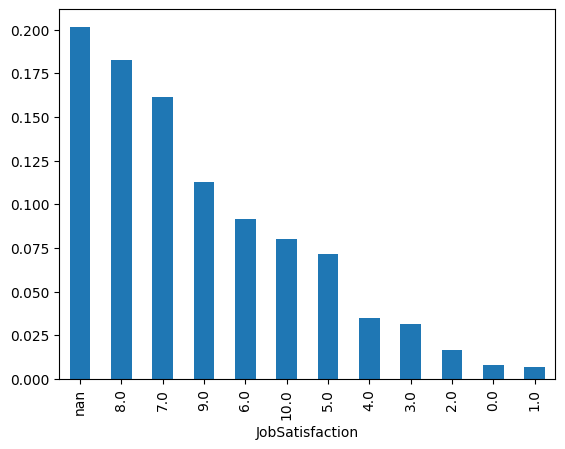

In [14]:
job_prop = (df['JobSatisfaction'].value_counts(dropna=False)/df.shape[0])
print(job_prop)
job_prop.plot(kind='bar')

In [31]:
df.groupby(['EmploymentStatus'])['JobSatisfaction'].mean()

EmploymentStatus
Employed full-time                                      6.980608
Employed part-time                                      6.846154
I prefer not to say                                          NaN
Independent contractor, freelancer, or self-employed    7.231985
Not employed, and not looking for work                       NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

EmploymentStatus_con
contractor       6.973959
un_contractor    7.231985
Name: JobSatisfaction, dtype: float64


<Axes: xlabel='EmploymentStatus_con'>

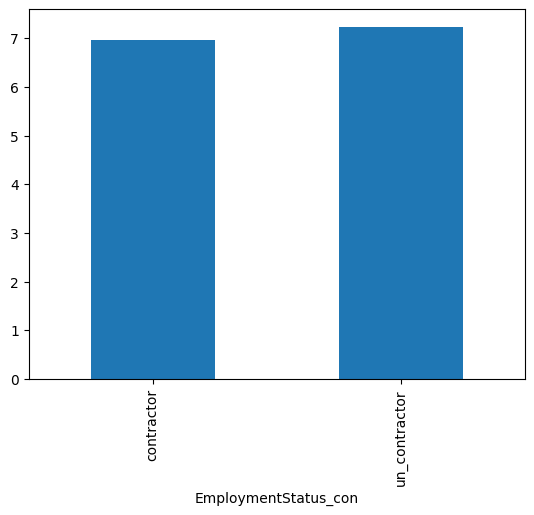

In [30]:
#More space for code
contractor = ['Employed full-time', 'Employed part-time']
un_contractor = ['Independent contractor, freelancer, or self-employed', 'Not employed, and not looking for work', 'Not employed, but looking for work', 'Retired']
df['EmploymentStatus_con'] = df['EmploymentStatus'].apply(lambda x: 'contractor' if x in contractor else 'un_contractor')

gb_em_job = df.groupby(['EmploymentStatus_con'])['JobSatisfaction'].mean()
print(gb_em_job)
gb_em_job.plot(kind='bar')

CompanySize
I prefer not to answer      7.284946
I don't know                7.054622
10 to 19 employees          7.035739
500 to 999 employees        7.029967
100 to 499 employees        7.029324
Fewer than 10 employees     7.025719
20 to 99 employees          6.997039
1,000 to 4,999 employees    6.908506
5,000 to 9,999 employees    6.832155
10,000 or more employees    6.793617
Name: JobSatisfaction, dtype: float64


<Axes: xlabel='CompanySize'>

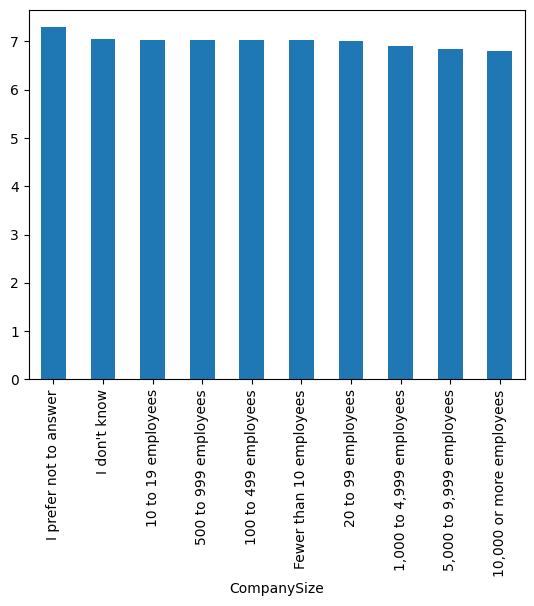

In [34]:
#Additional space for your additional code
cs_job = df.groupby(['CompanySize'])['JobSatisfaction'].mean().sort_values(ascending=False)
print(cs_job)
cs_job.plot(kind='bar')

In [ ]:
#Feel free to create new cells as you need them

#### Question 1

**1.** Use the space above to assist in matching each variable (a, b, c, d, e, f, g, or h) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [36]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d,
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f}
             
t.jobsat_check1(job_sol_1)

Nice job! That's what we found as well!


#### Question 2

**2.** Use the space above to assist in matching each variable (a, b, c) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

In [ ]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': #letter here,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': #letter here, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': #letter here}
             
t.jobsat_check2(job_sol_2)